In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [3]:
# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

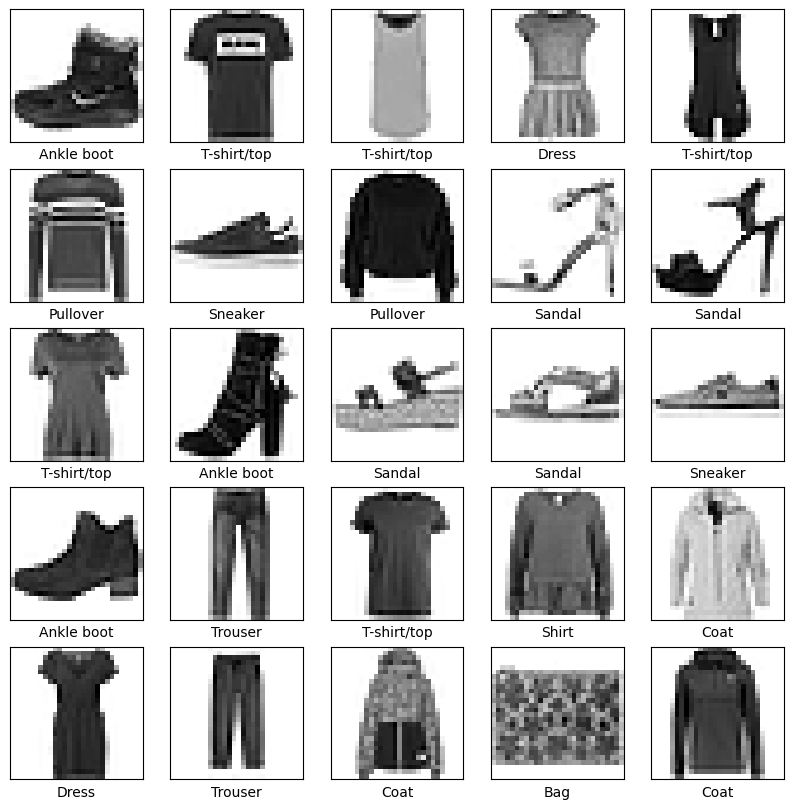

In [5]:
plt.figure(figsize=(10,10))

# Show first 25 training images below
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [6]:
# Make a simple neural network model
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))        
model.add(layers.Dense(32, activation=tf.nn.sigmoid))
model.add(layers.Dense(32, activation=tf.nn.sigmoid))       
model.add(layers.Dense(10, activation=tf.nn.softmax))   
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
epochs = 10
model.fit(x_train, y_train, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.8512 - accuracy: 0.7394
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4454 - accuracy: 0.8438
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3942 - accuracy: 0.8597
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3701 - accuracy: 0.8671
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3518 - accuracy: 0.8735
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3393 - accuracy: 0.8782
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3287 - accuracy: 0.8815
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3188 - accuracy: 0.8846
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3105 - accuracy: 0.8867
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.303

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Print the loss and accuracy of the test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Print the confusion matrix

test_predict=model.predict(x_test) 
test_classes=np.argmax(test_predict,axis=1)

report = """
Confusion Matrix:
{}
""".format(confusion_matrix(y_test, test_classes))
print(report)

# Print the classification report
print("Classification report")
print(classification_report(y_test, test_classes, target_names=class_names))

Test loss: 0.3575531542301178
Test accuracy: 0.8726000189781189

Confusion Matrix:
[[839   1  14  35   4   0  95   0  12   0]
 [  2 968   3  19   6   0   1   0   1   0]
 [ 19   1 792  11 108   0  65   0   4   0]
 [ 28  13   5 874  39   0  37   0   4   0]
 [  0   1  95  31 816   0  55   0   2   0]
 [  0   0   0   1   0 944   0  29   4  22]
 [144   2  98  27  89   0 619   0  21   0]
 [  0   0   0   0   0  27   0 956   0  17]
 [  2   0   2   2   5   3   8   4 974   0]
 [  0   0   0   1   0   9   1  44   1 944]]

Classification report
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.84      0.82      1000
     Trouser       0.98      0.97      0.97      1000
    Pullover       0.78      0.79      0.79      1000
       Dress       0.87      0.87      0.87      1000
        Coat       0.76      0.82      0.79      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.70      0.62      0.66      1000
     Sneaker       0.93      0

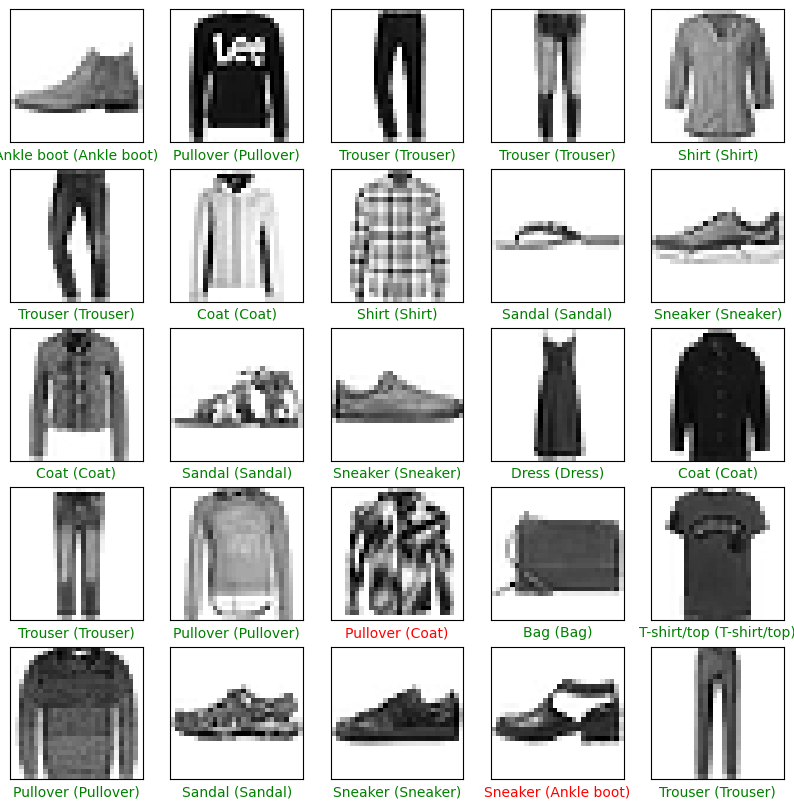

In [10]:
# Code to visualize predictions
# Incorrect predictions are highlighted in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = test_classes[i]
    true_label = y_test[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

# Improvement

## Slightly Complex Model With Validation Data

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()  # Get the MNIST data
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [12]:
# Reshape the data
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28, 1) y_train shape: (60000,)


In [13]:
from sklearn.model_selection import train_test_split
# Split the train data to train and validation data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2019) 
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape, "y_val shape:", y_val.shape)

x_train shape: (48000, 28, 28, 1) y_train shape: (48000,)
x_val shape: (12000, 28, 28, 1) y_val shape: (12000,)


In [14]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 50)                270450    
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                      

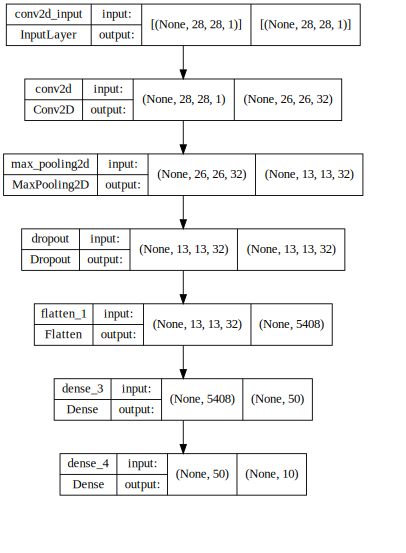

In [16]:
from IPython.display import SVG

from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) # Save the diagram as model_plot.png

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, dpi =65).create(prog='dot',format='svg')) # Visualize the diagram


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10
1500/1500 [==============================] - 9s 3ms/step - loss: 0.4463 - accuracy: 0.8411 - val_loss: 0.3204 - val_accuracy: 0.8858
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3137 - accuracy: 0.8879 - val_loss: 0.2911 - val_accuracy: 0.8956
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2747 - accuracy: 0.9011 - val_loss: 0.2726 - val_accuracy: 0.9028
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2471 - accuracy: 0.9092 - val_loss: 0.2598 - val_accuracy: 0.9067
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2246 - accuracy: 0.9178 - val_loss: 0.2572 - val_accuracy: 0.9058
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2056 - accuracy: 0.9250 - val_loss: 0.2546 - val_accuracy: 0.9097
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1894 - accuracy: 0.9296 - val_loss: 0.2637 - val_accuracy:

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Print the loss and accuracy of the test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Print the confusion matrix

test_predict= model.predict(x_test) 
test_classes=np.argmax(test_predict,axis=1)
report = """
Confusion Matrix:
{}
""".format(confusion_matrix(y_test, test_classes))
print(report)
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
# Print the classification report
print("Classification report")
target_names = ["Class {} {}".format(i, labels[i]) for i in range(10)]
print(classification_report(y_test, test_classes, target_names=target_names))

Test loss: 0.28843289613723755
Test accuracy: 0.9032999873161316

Confusion Matrix:
[[914   0   7  19   2   2  45   0  11   0]
 [  4 972   0  19   1   0   2   0   2   0]
 [ 26   0 889  15  22   0  48   0   0   0]
 [ 19   1   8 947   4   0  19   0   2   0]
 [  5   0 131  59 748   0  57   0   0   0]
 [  0   0   0   0   0 971   0  20   0   9]
 [164   0  74  35  43   0 678   0   6   0]
 [  0   0   0   0   0   3   0 972   0  25]
 [  4   1   2   8   0   2   2   3 978   0]
 [  1   0   0   0   0   6   0  29   0 964]]

Classification report
                     precision    recall  f1-score   support

Class 0 T-shirt/top       0.80      0.91      0.86      1000
    Class 1 Trouser       1.00      0.97      0.98      1000
   Class 2 Pullover       0.80      0.89      0.84      1000
      Class 3 Dress       0.86      0.95      0.90      1000
       Class 4 Coat       0.91      0.75      0.82      1000
     Class 5 Sandal       0.99      0.97      0.98      1000
      Class 6 Shirt       0.80    

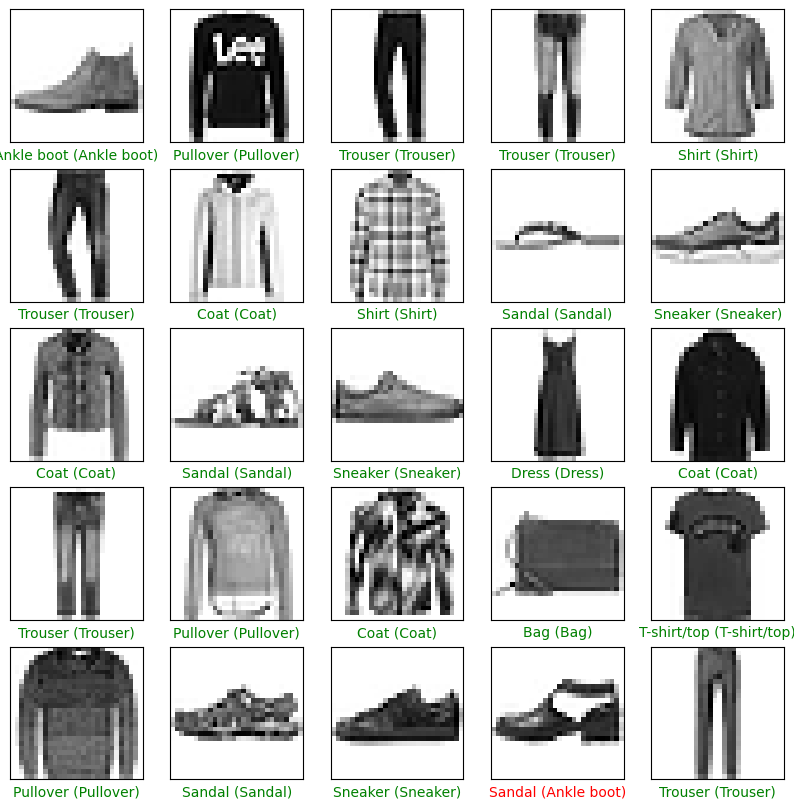

In [20]:
# Code to visualize predictions
# Incorrect predictions are highlighted in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = test_classes[i]
    true_label = y_test[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

## Two-Branch Model

In [21]:
# Make the two branch model
inputs = tf.keras.Input(shape = (28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation = 'relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
block_1 = layers.Flatten()(x)

x = layers.Flatten()(inputs)
block_2 = layers.Dense(64, activation = 'relu')(x)
                                     
converge = tf.keras.layers.concatenate([block_1, block_2])

x = layers.Dense(32, activation='relu') (converge)
outputs = layers.Dense(10, activation='softmax') (x)
                                     
model2 = tf.keras.Model(inputs, outputs)

In [22]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_1[0][0]']               
                                                                                                  
 flatten_3 (Flatten)            (None, 784)          0           ['input_1[0][0]']                
                                                                                              

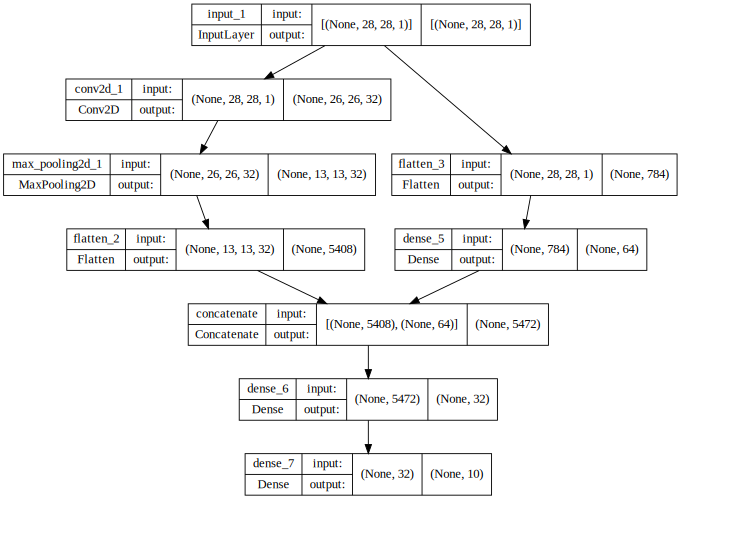

In [23]:
plot_model(model2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True) # Save the diagram as model2_plot.png
SVG(model_to_dot(model2, show_shapes=True, show_layer_names=True, dpi=65).create(prog='dot',format='svg')) # Visualize the diagram

In [24]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4435 - accuracy: 0.8444 - val_loss: 0.3350 - val_accuracy: 0.8829
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3031 - accuracy: 0.8905 - val_loss: 0.2889 - val_accuracy: 0.8969
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2605 - accuracy: 0.9050 - val_loss: 0.2855 - val_accuracy: 0.8957
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2353 - accuracy: 0.9138 - val_loss: 0.2679 - val_accuracy: 0.9015
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2136 - accuracy: 0.9218 - val_loss: 0.2634 - val_accuracy: 0.9087
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1951 - accuracy: 0.9281 - val_loss: 0.2797 - val_accuracy: 0.8996
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1786 - accuracy: 0.9342 - val_loss: 0.2718 - val_accuracy:

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Print the loss and accuracy of the test data
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Print the confusion matrix

test_predict= model2.predict(x_test) 
test_classes=np.argmax(test_predict,axis=1)
report = """
Confusion Matrix:
{}
""".format(confusion_matrix(y_test, test_classes))
print(report)
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
# Print the classification report
print("Classification report")
target_names = ["Class {} {}".format(i, labels[i]) for i in range(10)]
print(classification_report(y_test, test_classes, target_names=target_names))

Test loss: 0.27382856607437134
Test accuracy: 0.9089000225067139

Confusion Matrix:
[[848   1  19  23   3   2  97   0   6   1]
 [  1 985   0   9   2   0   3   0   0   0]
 [ 18   1 864   8  50   1  58   0   0   0]
 [  9   9  12 921  21   0  25   0   3   0]
 [  1   1  55  24 858   1  58   0   2   0]
 [  0   0   0   0   0 984   0   7   0   9]
 [ 92   2  61  37  54   0 745   0   9   0]
 [  0   0   0   0   0  20   0 924   0  56]
 [  2   0   0   7   2   3   5   3 978   0]
 [  0   0   0   0   0   5   1  12   0 982]]

Classification report
                     precision    recall  f1-score   support

Class 0 T-shirt/top       0.87      0.85      0.86      1000
    Class 1 Trouser       0.99      0.98      0.99      1000
   Class 2 Pullover       0.85      0.86      0.86      1000
      Class 3 Dress       0.90      0.92      0.91      1000
       Class 4 Coat       0.87      0.86      0.86      1000
     Class 5 Sandal       0.97      0.98      0.98      1000
      Class 6 Shirt       0.75    

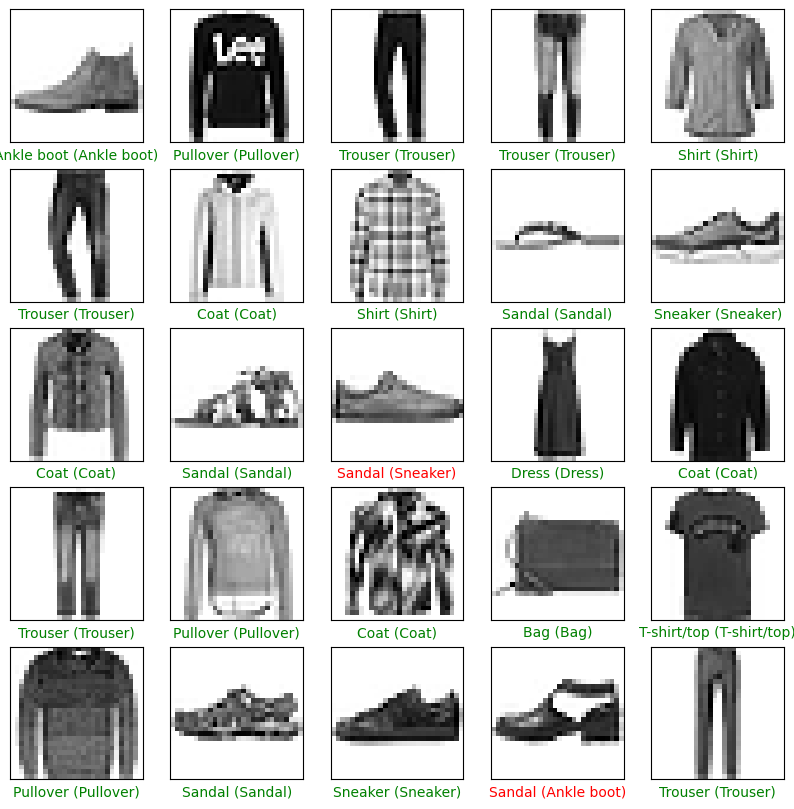

In [27]:
# Code to visualize predictions
# Incorrect predictions are highlighted in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = test_classes[i]
    true_label = y_test[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)